In [2]:
import pandas as pd

nvda_hist = pd.read_csv("/content/nvda_historical_data.csv")
nvda_hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-01-03 00:00:00-05:00,0.090268,0.090984,0.084297,0.089431,300912000,0.0,0.0
1,2000-01-04 00:00:00-05:00,0.087879,0.088118,0.082625,0.087044,300480000,0.0,0.0
2,2000-01-05 00:00:00-05:00,0.084536,0.085969,0.082984,0.084178,188352000,0.0,0.0
3,2000-01-06 00:00:00-05:00,0.084178,0.084178,0.075462,0.078685,120480000,0.0,0.0
4,2000-01-07 00:00:00-05:00,0.078327,0.080835,0.077134,0.079999,71184000,0.0,0.0


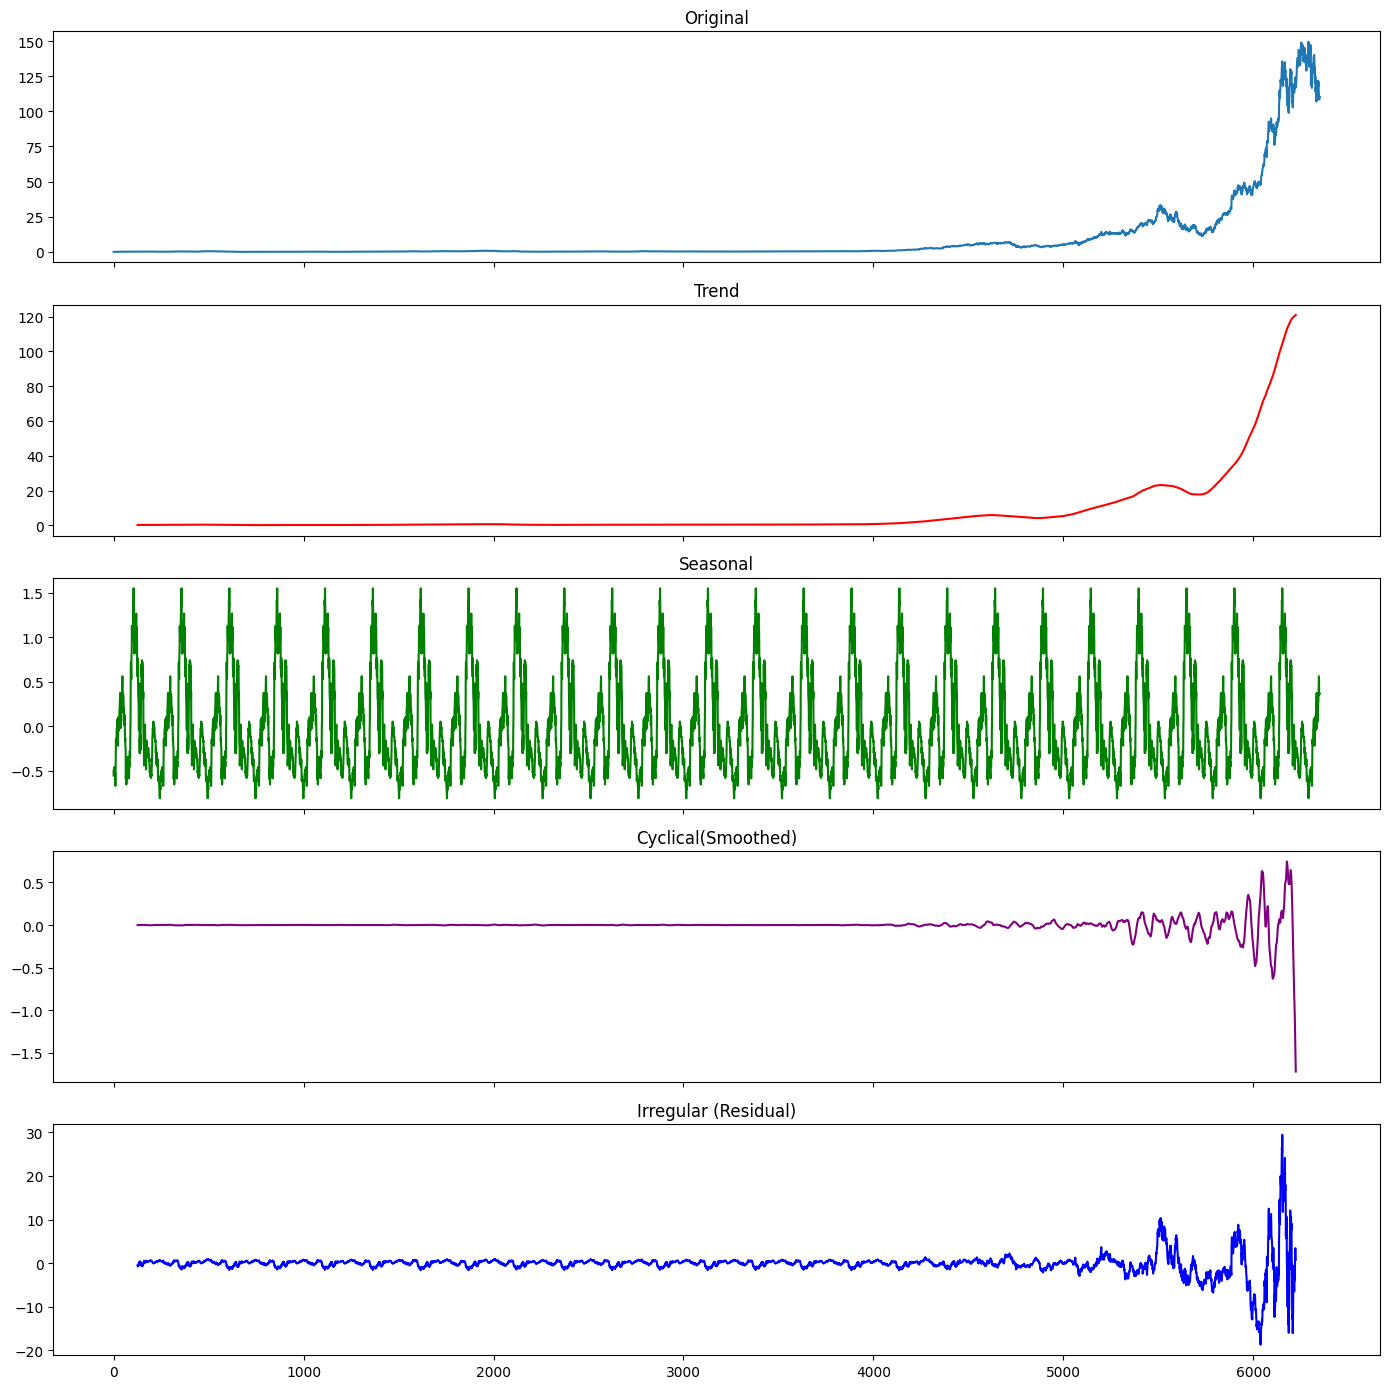

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.filters.hp_filter import hpfilter

close = nvda_hist["Close"].dropna()
decomposition = seasonal_decompose(close, model="additive", period=252)
cycle,trend_hp = hpfilter(decomposition.trend.dropna(), lamb= 129600)

fig, axes = plt.subplots(5,1,figsize= (14,14), sharex= True)

axes[0].set_title("Original")
axes[0].plot(close, label="Close Price")
axes[0].legend

axes[1].set_title("Trend")
axes[1].plot(decomposition.trend, label="Trend", color= "red")
axes[1].legend

axes[2].set_title("Seasonal")
axes[2].plot(decomposition.seasonal, label="Seasonal", color= "green")
axes[2].legend

axes[3].set_title("Cyclical(Smoothed)")
axes[3].plot(cycle, label="Cyclical", color= "purple")
axes[3].legend

axes[4].set_title("Irregular (Residual)")
axes[4].plot(decomposition.resid, label="Residual", color= "blue")
axes[4].legend

plt.tight_layout()
plt.show()